## This is exp 5x6 for ibmq_belem. The initial circuit is 5x4 which is then traspiled to 5x6. Only H and CNOT gates are used.

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

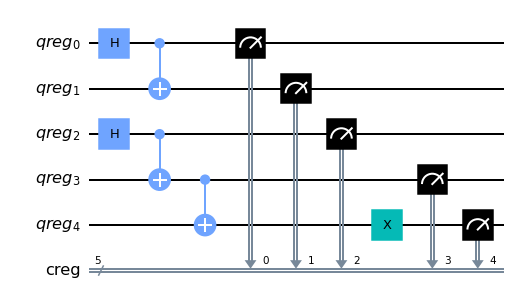

In [3]:
#define the number of qubits - width
width = 5

#define the quantum register
q =  QuantumRegister(width,"qreg")

# define a classical register
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)

qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)
qc.x(4)

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [4]:
qc.depth()

5

{'10000': 2491, '10011': 2504, '01100': 2484, '01111': 2521}



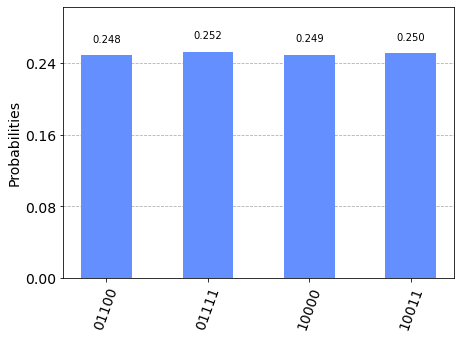

In [5]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2021-06-25 19:22:09,745: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

### Run the circuit with optimization_level = 1

In [10]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


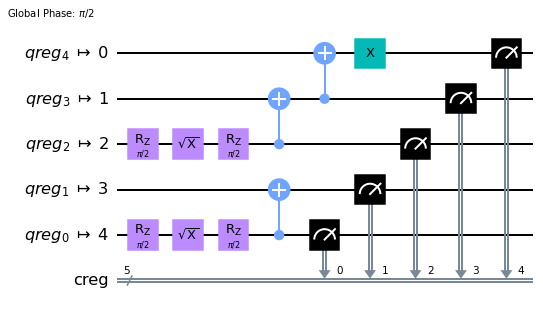

In [11]:
qc_transpiled.draw(output='mpl')

In [12]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 23, '10000': 196, '10001': 22, '10010': 12, '10011': 163, '10100': 43, '10101': 3, '10111': 23, '11000': 9, '11001': 1, '11011': 8, '11100': 4, '11111': 2, '00011': 11, '00100': 6, '00110': 1, '00111': 10, '01000': 94, '01001': 3, '01010': 7, '01011': 89, '01100': 144, '01101': 7, '01110': 9, '01111': 134}


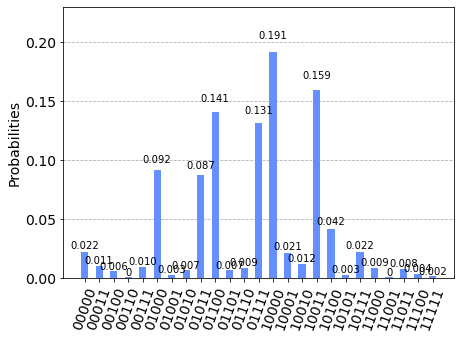

In [13]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)

### Run the circuit with optimization_level = 2

In [14]:
qc_transpiled = transpile(qc, backend, optimization_level=2)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


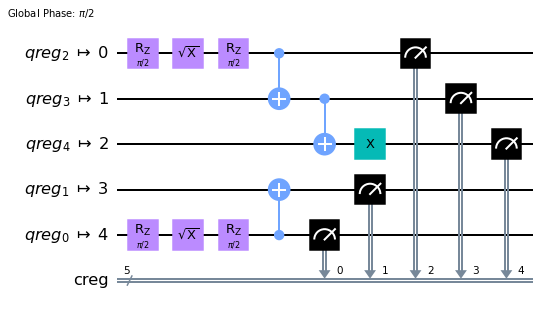

In [15]:
qc_transpiled.draw(output='mpl')

In [16]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 28, '00001': 2, '10000': 218, '10001': 18, '10010': 9, '10011': 177, '10100': 20, '10101': 1, '10110': 3, '10111': 25, '11000': 9, '11011': 12, '11100': 4, '11111': 2, '00011': 14, '00100': 9, '00101': 1, '00111': 9, '01000': 89, '01001': 12, '01010': 9, '01011': 77, '01100': 142, '01101': 7, '01110': 8, '01111': 119}


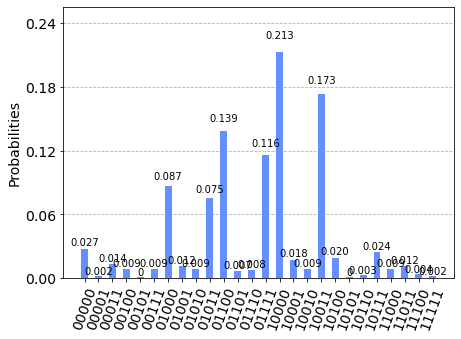

In [17]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)

### Run the circuit with optimization_level = 3

In [18]:
qc_transpiled = transpile(qc, backend, optimization_level=3)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 7


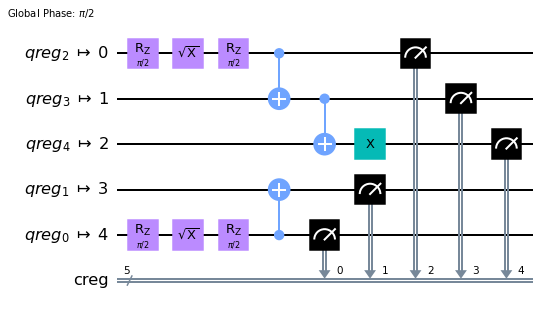

In [19]:
qc_transpiled.draw(output='mpl')

In [20]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 20, '00001': 2, '10000': 216, '10001': 14, '10010': 16, '10011': 165, '10100': 35, '10110': 4, '10111': 28, '11000': 7, '11011': 4, '11100': 5, '11110': 1, '11111': 5, '00010': 1, '00011': 14, '00100': 7, '00110': 1, '00111': 6, '01000': 98, '01001': 4, '01010': 2, '01011': 79, '01100': 147, '01101': 11, '01110': 13, '01111': 119}


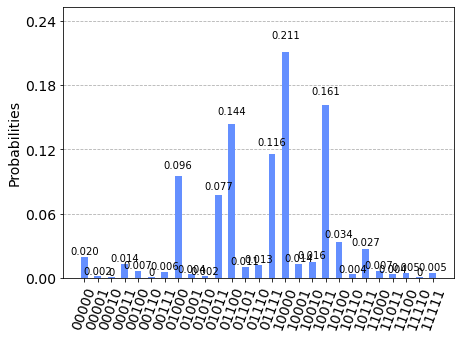

In [21]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

plot_histogram(answer)